# **Automatidata Project**
**Data provided as part of the Google Advanced Data Analytics Certification (Offered Through Coursera)**

**Scenario**:  A ficitious data consulting firm, Automatidata, has been hired by the New York City Taxi and Limousine Commission (TLC) to develop a regression model that helps estimate taxi fares before the ride. Required deliverables include:
> - Inspection of the dataset before analysis begins
> - Determination of what the TLC data provides by using exploratory data analysis (EDA)
> - Development of a machine learning model
>> - Testing of the model to assure the model is delivering consistent results
> - Determine whether or not the model meets project requirements

## Inspection and Understanding of the Data

In [2]:
# Import necessary libraries and packages:

import pandas as pd
import numpy as np

In [3]:
# Load the dataset into a dataframe:

df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [4]:
# Display the first few lines of the dataframe to understand the organization:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Since it's unclear what some of the column names mean, clarification was obtained from the TLC:<br>
**Unnamed: 0**: Unique trip identification number<br>
**VendorID**: Code indicating the Taxi Technology Service Provider (TPEP) system installed in the cab<br>
> 1 = Creative Mobile Technologies, LLC<br>
> 2 = VeriFone Inc<br>

**tpep_pickup_datetime**: The date and time when the meter was engaged<br>
**tpep_dropoff_datetime**: The data and time when the meter was disengaged<br>
**passenger_count**: The number of passengers in the vehicle (driver-entered value)<br>
**trip_distance**: Elapsed trip distance in miles<br>
**RatecodeID**: The final rate code in effect at the end of the trip<br>
> 1 = Standard rate<br>
> 2 = JFK<br>
> 3 = Newark<br>
> 4 = Nassau or Westchester<br>
> 5 = Negotiated Fare<br>
> 6 = Group Ride<br>

**store_and_fwd_flag**: Indicates whether the trip record was held in vehicle memory before being sent to the vendor because the vehicle did not have a connection to the server<br>
> Y = store and forward trip<br>
> N = not a store and forward trip<br>

**PULocationID**: TLC taxi zone in which the taxi meter was engaged<br>
**DOLocationID**: TLC taxi zone in which the taxi meter was disengaged<br>
**payment_type**: Numeric code signifying how the trip was paid for<br>
> 1 = credit card<br>
> 2 = cash<br>
> 3 = no charge<br>
> 4 = dispute<br>
> 5 = unknown<br>
> 6 = voided trip<br>

**fare amount**: the time and distance fare calculated by the taxi meter<br>
**extra**: other surcharges, only includes the \\$0.50 and \\$1 rush hour and overnight charges<br>
**mta_tax**: \\$0.50 tax that is automatically triggered based on the metered rate in use<br>
**improvement_surcharge**: \\$0.30 improvement surcharge assessed on trips at the flag drop<br>
**tip_amount**: tip amount. Automatically populated for credit card tips. Does not include cash tips<br>
**tolls_amount**: total amount of all tolls paid in trip<br>
**total_amount**: total amount charged to passengers, not including cash tips

In [5]:
# Determine data types and check for any missing entries:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Observations:<br>
1. Given that the goal of the project is development of a model to estimate fares before a ride, many of the variables will not be necessary to achieve this goal.
2. There are no null values in this dataset which will make preparation and analysis easier
3. The tpep_pickup_datetime and tpep_dropoff_datetime columns are currently in object (string) datatype format. These will most likely need to be converted to datetime should these variables be needed for the model.

In [6]:
# Obtain summary statistics about the dataframe:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Observations:<br>
1. The minimum **trip_distance** is 0 which could potentially be erroneous. Although the max **trip_distance** is nearly 34 miles, which seems long for a taxi ride, it's probably not unreasonable.
2. The minimum **fare_amount** is \\$-120 and the max is \\$999.99. While a negative fare amount is impossible, the max amount listed is far above the average of $13 and should be investigated.
3. The **extra**, **mta_tax** and **improvement_surcharge** columns have negative minimum values. Since these affect the amount. in the **total_amount** column which could be necessary for the project goal, these negative values should be investigated.
4. The max **tip_amount** is \\$200 which is extremely high compared to the average of \\$2.8, and an unusual amount for a tip.
5. The max **tolls_amount** is \\$19.1 compared to the average of \\$1.4. This high value may not be an outlier however depending on the nature/length/route of the trip.
6. The min and max **total_amount** are clearly being affected by the **fare_amount** and **tip_amount** outliers (and possibly the potential **tolls_amount** max outlier).


## Variable Investigation
Since **trip_distance** and **total_amount** are, at first glance, most related to fare prediction before a ride occurs, these variables can be investigated first.

In [7]:
# First, sort trip_distance from max to min to see if the max trip distance discovered above is an outlier

trip_distance_sort = df.sort_values(by = 'trip_distance', ascending = False)
trip_distance_sort.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,06/16/2017 6:51:20 PM,06/16/2017 7:41:42 PM,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


Although the max trip distance seems large for a taxi ride, the next nine rides are also long, so this is definitely not an outlier. Additionally, it appears that trip distance and total fare are not correlated--this will be worth investigating/understanding.

In [8]:
# Next, sort total fare amount from maximum to minium
total_amount_sort_top = df.sort_values(by = 'total_amount', ascending = False)
total_amount_sort_top.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
16379,101198443,2,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
3582,111653084,1,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
11269,51920669,1,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30


After the very high total amount of \\$1200, the next highest amount is \\$450.30. Although this still seems very high for a taxi fare, there are at least 8 other total fares above \\$100, making the \\$450 fare appear to be valid. However, the \\$1200 total fare still appears to be suspect.

In [9]:
# Check for negative total fares by sorting from minimum to maximum
total_amount_sort_bottom = df.sort_values(by = 'total_amount')
total_amount_sort_bottom.head(15)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12944,29059760,2,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,1,0.17,5,N,138,138,4,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3
20698,14668209,2,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,1,0.70,1,N,65,25,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8
17602,24690146,2,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,1,0.46,1,N,87,45,4,-4.0,-1.0,-0.5,0.0,0.0,-0.3,-5.8
11204,58395501,2,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,1,0.64,1,N,50,48,3,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3
14714,109276092,2,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,5,0.40,1,N,164,161,4,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3
8204,91187947,2,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,1,0.41,1,N,236,237,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8
20317,75926915,2,09/09/2017 10:59:51 PM,09/09/2017 11:02:06 PM,1,0.24,1,N,116,116,4,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8
10281,55302347,2,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,2,0.00,1,N,238,238,4,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-4.3
5448,28459983,2,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,1,0.25,1,N,90,68,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3
4423,97329905,2,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3


There are 14 entries in the dataset that have negative total amounts. These appear to be a result of recorded negative fare, negative values in the **extra** column, negative values in the **mta_tax** column and negative values in the **improvement_surcharge** column. These entries will have to somehow be accounted for or dropped for the final model.

In [10]:
# Looking at total_amount_sort_bottom, the negative total_amounts have payment methods 3 and 4 associated with the data. 
# Sort the data to see how many of each payment type are represented in the data:

df['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

From the data dictionary, 1 = credit card, 2 = cash, 3 = no charge and 4 = dispute. So the negative values reults from either "no charge" or "dispute." This probably means that these entries can be excluded from the final model since they aren't representative of actual fares.

In [11]:
# Does the vendor (TPEP system) have any effect on total fare amount?
# How many times is each vendor ID represented in the table?
df['VendorID'].value_counts()

2    12626
1    10073
Name: VendorID, dtype: int64

This shows that there are about 2600 more entries from TPEP devices made by vendor 2 (VeriFone Inc)--approximately 20% more. Does this translate to different mean total fares?

In [12]:
# What is the mean total amount for each vendor?
df.groupby('VendorID')['total_amount'].mean()

VendorID
1    16.298119
2    16.320382
Name: total_amount, dtype: float64

The results above show no significant difference in mean total fares between the two TPEP devices in TLC taxis.

In [13]:
# Does passenger count have an effect on tip amount/total fare amount?
# Tips are only recorded for credit card payments so the data must first be filtered for credit card payments only
mask = df['payment_type'] == 1
data_cc_filter = df[mask]

# Filter data_cc_filter for passenger count only
data_cc_filter['passenger_count'].value_counts()

1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: passenger_count, dtype: int64

Note here that there are significantly more single (1) passenger rides than others, and 27 entries have 0 passengers, which seems unusual.

In [14]:
# Calculate the average tip amount for each passenger count
data_cc_filter.groupby(['passenger_count']).mean()['tip_amount']

passenger_count
0    2.610370
1    2.714681
2    2.829949
3    2.726800
4    2.607753
5    2.762645
6    2.643326
Name: tip_amount, dtype: float64

The mean tip amount does not appear to be dependent on the number of passengers per ride.

## Exploratory Data Analysis (EDA)

The goal of this section is to perform futher data exploration and cleaning as well as build visualizations to better understand the data. Data has been assessed in the previous section and the most applicable variables have been selected.

In [15]:
# Visualization libraries seaborn and matplotlib as well as the datetime library need to be loaded:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [16]:
# In order to work with the tpep_pickup_datetime and tpep_dropoff_datetime columns, the data must be converted to datetime format:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

First, an outlier check will be performed for relevant variables such as trip distance, total amount (including the variables that go into the total amount calculation) and trip duration (determined from from the datetime conversion of the pickup and dropoff variables).

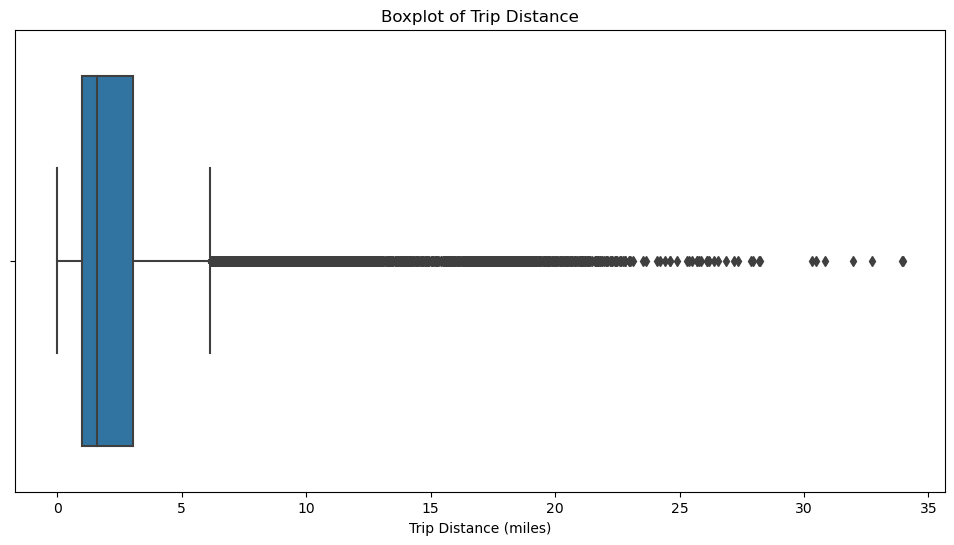

In [17]:
# Create a boxplot of trip_distance
plt.figure(figsize = (12,6))
sns.boxplot(data = None, x = df['trip_distance'])
plt.title('Boxplot of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.show()

From the boxplot above, the highest distribution of trips are below about 6 miles, with outliers out to nearly 35 miles.

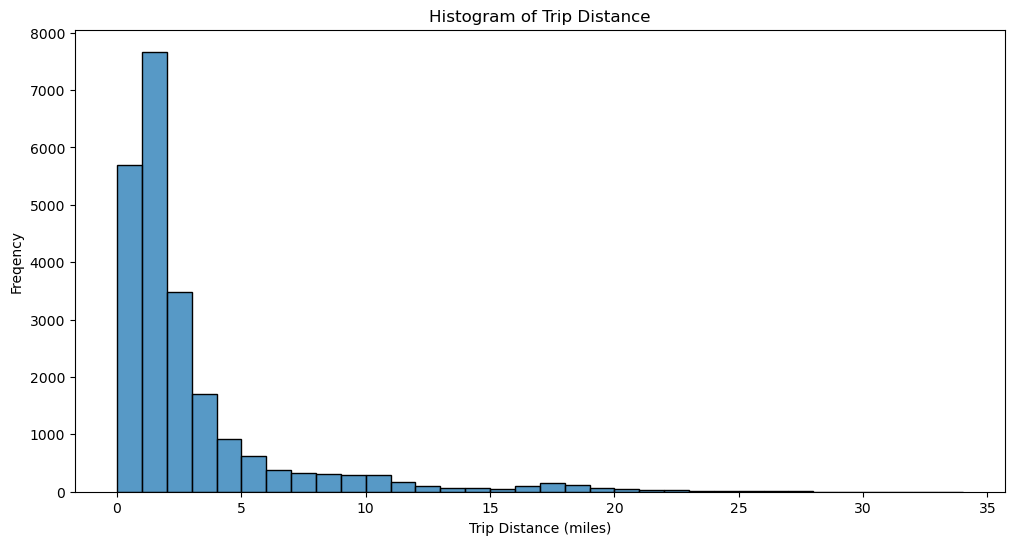

In [18]:
# Create a histogram of trip_distance
plt.figure(figsize = (12,6))
sns.histplot(df['trip_distance'], bins = range(0,35,1))
plt.title('Histogram of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Freqency')
plt.show()

Most trips fall below a distance of 2 miles and tail off as the distance increases beyond 2 miles.

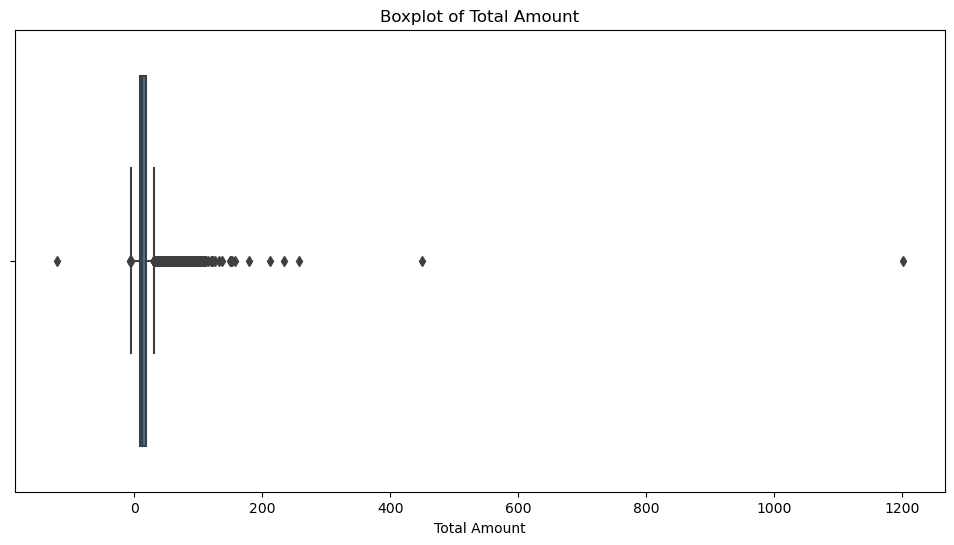

In [19]:
# Create a boxplot of total_amount
plt.figure(figsize = (12,6))
sns.boxplot(data = None, x = df['total_amount'])
plt.title('Boxplot of Total Amount')
plt.xlabel('Total Amount')
plt.show()

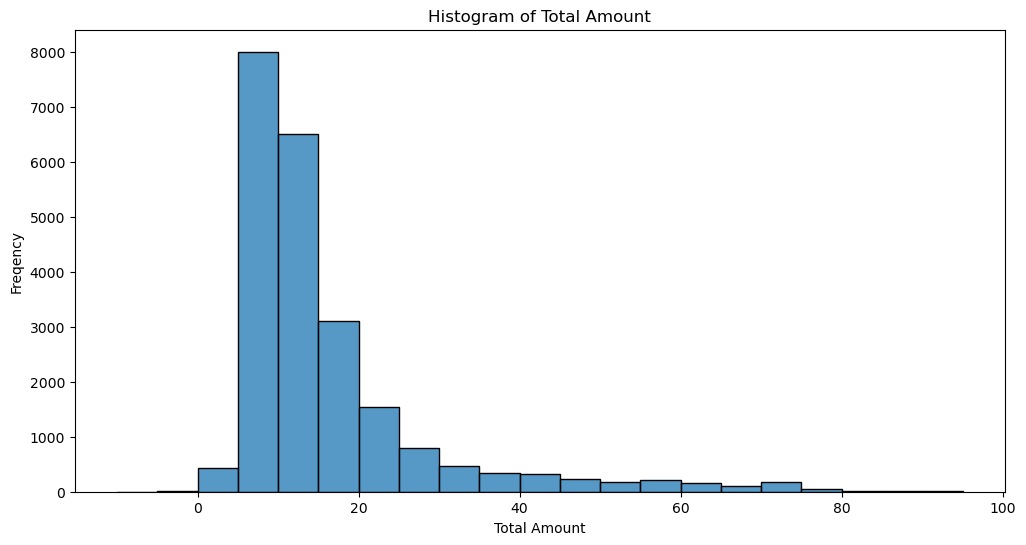

In [20]:
# Create a histogram of total_amount
plt.figure(figsize = (12,6))
sns.histplot(df['total_amount'], bins = range(-10,100,5))
plt.title('Histogram of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Freqency')
plt.show()

Both the boxplot and histogram show the majority of total taxi fare to be in the \\$5 to \\$15 range. The boxplot clearly shows the negative and very high total fare outliers. The total cost of each trip has a right-skewed distribution, mirroring the distribution of trip distance.

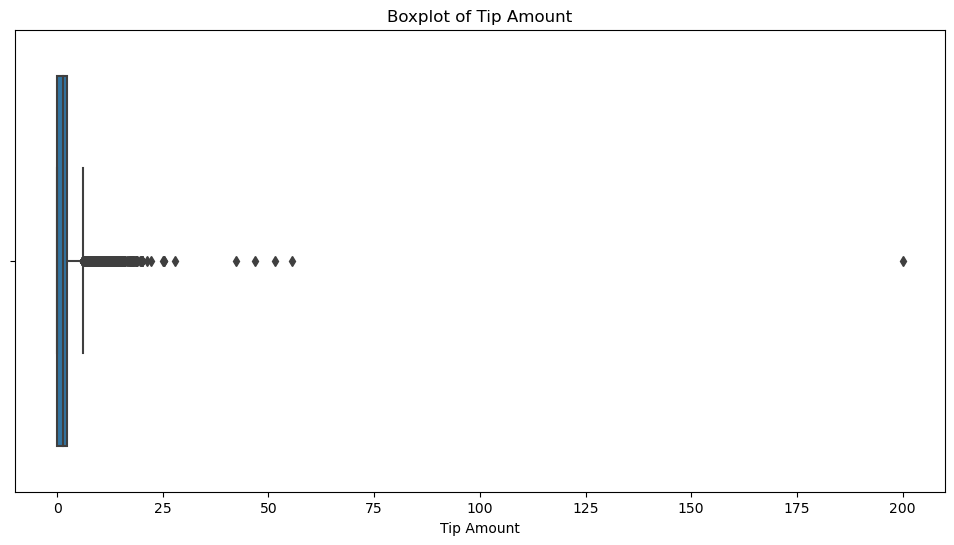

In [21]:
# Create a boxplot of tip_amount
plt.figure(figsize = (12,6))
sns.boxplot(data = None, x = df['tip_amount'])
plt.title('Boxplot of Tip Amount')
plt.xlabel('Tip Amount')
plt.show()

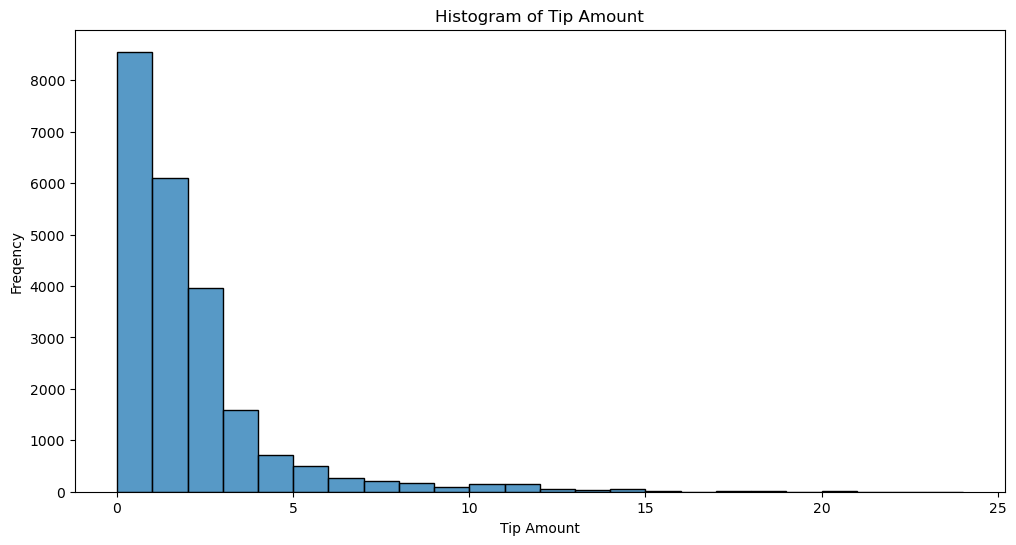

In [22]:
# Create a histogram of tip_amount
plt.figure(figsize = (12,6))
sns.histplot(df['tip_amount'], bins = range(0,25,1))
plt.title('Histogram of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Freqency')
plt.show()

Both the boxplot and histogram show the majority of tips to be in the \\$0 to \\$3 range. The boxplot clearly shows the high tip outlier around \\$200. Like trip distance and total fare, the tip amount shows a right-skewed distribution.

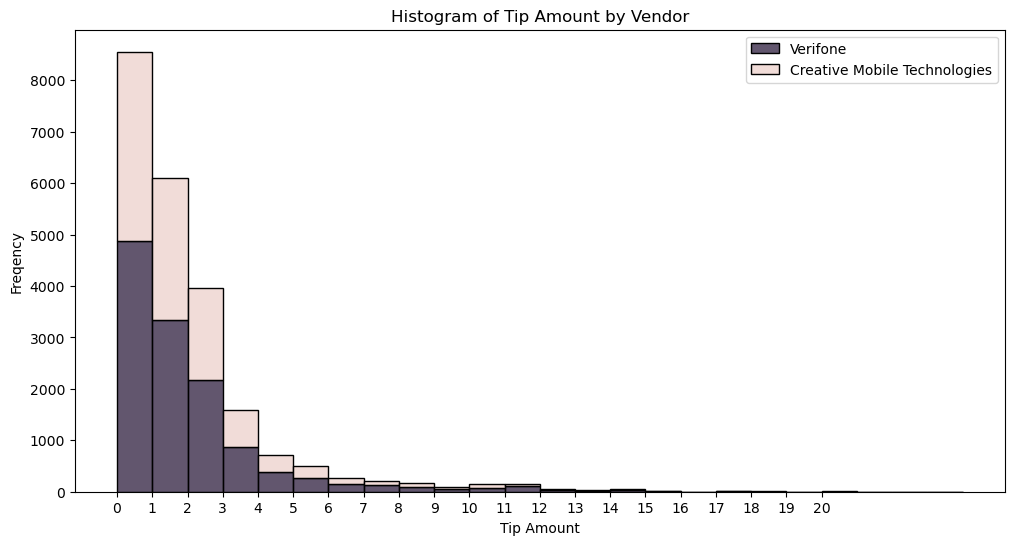

In [23]:
# Create a histogram of tip_amount by vendor to check for any discrepancy
plt.figure(figsize = (12,6))
ax = sns.histplot(data = df,
             x = 'tip_amount',
             bins = range(0,25,1),
             hue = 'VendorID',
             multiple = 'stack')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Histogram of Tip Amount by Vendor')
plt.xlabel('Tip Amount')
plt.ylabel('Freqency')
plt.legend(labels = ['Verifone', 'Creative Mobile Technologies'])
plt.show()

Although earlier analysis showed Verifone has a slightly higher share of rides, separation of tip amount by vendor shows that the proportion of tip amount between the two vendors is maintained. Therefore, there are no significant differences in tip distribution between the two vendors. 

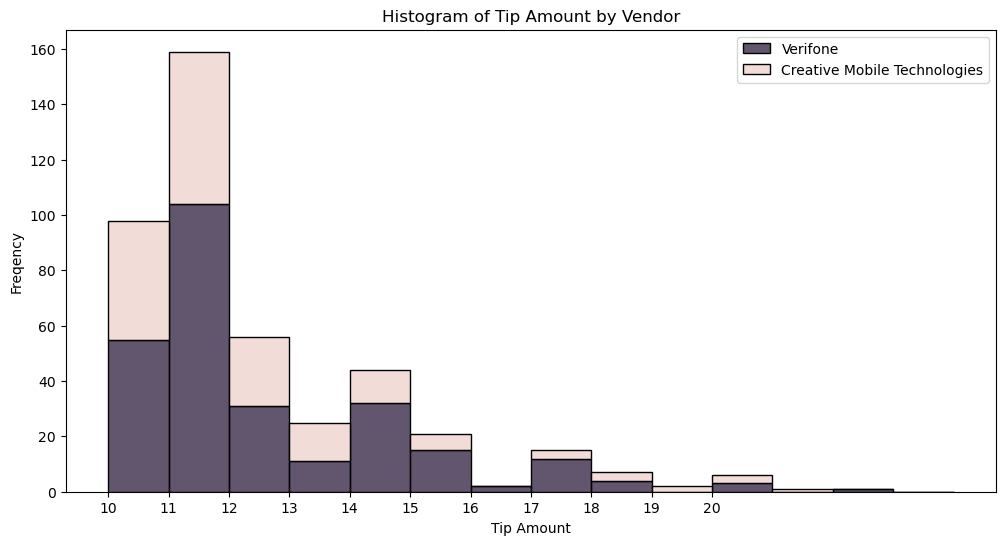

In [24]:
# It is worth checking to see if this proportion is maintained at higher tip
# amounts. Create a histogram of tip_amount by vendor for tips > $10:
tips_over_ten = df[df['tip_amount'] > 10]

plt.figure(figsize = (12,6))
ax = sns.histplot(data = tips_over_ten,
             x = 'tip_amount',
             bins = range(10,25,1),
             hue = 'VendorID',
             multiple = 'stack')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Histogram of Tip Amount by Vendor')
plt.xlabel('Tip Amount')
plt.ylabel('Freqency')
plt.legend(labels = ['Verifone', 'Creative Mobile Technologies'])
plt.show()

Proportions of tip amount by TPEP vendor are generally maintained above \\$10, with some exception about \\$14, however the sample size at this level is very low and therefore can probably be disregarded.

In [25]:
# Revisit tips by passenger count to visually plot any differences.
# First reexamine the number of rides per number of passengers:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

Again, nearly two thirds of rides had only one passenger. There are 33 rides with 0 passengers which can most likely be dropped from the model data unless a reasonable explanation is found.

<Figure size 1200x600 with 0 Axes>

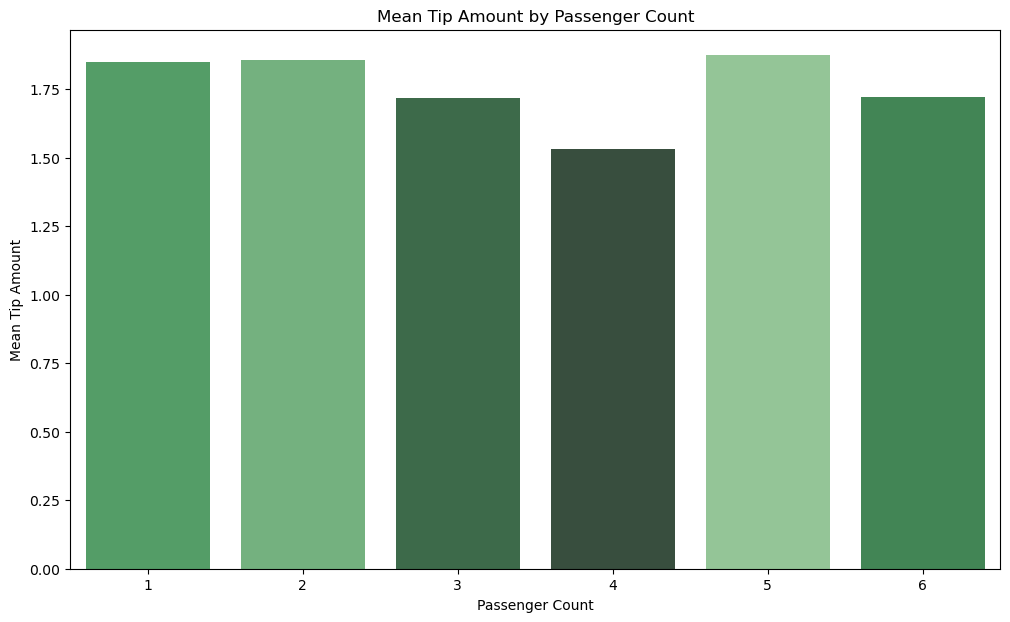

In [26]:
# Calculate mean tips per passenger and create a bar plot to visualize, omitting 
# data for 0 passengers
mean_tips = df.groupby(['passenger_count']).mean()[['tip_amount']]

plt.figure(figsize = (12,6))
data = mean_tips.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=np.array(pal[::-1])[rank])
plt.xlabel('Passenger Count')
plt.ylabel('Mean Tip Amount')
plt.title('Mean Tip Amount by Passenger Count')
plt.show()

Mean tip values show little dependence on the number of passengers, with some possible exception for 4 riders, though this may be due to the smaller number of 4 passenger rides compared to others (and not including 0 passengers).

In [27]:
# Investigate the data based on time. Datetime conversions were done earlier.
# Create month and day columns for pickup data:
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [28]:
# Determine the total number of rides for each month:
monthly_rides = df['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

In [29]:
# The months are out of order so need to reorder the list:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index = month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

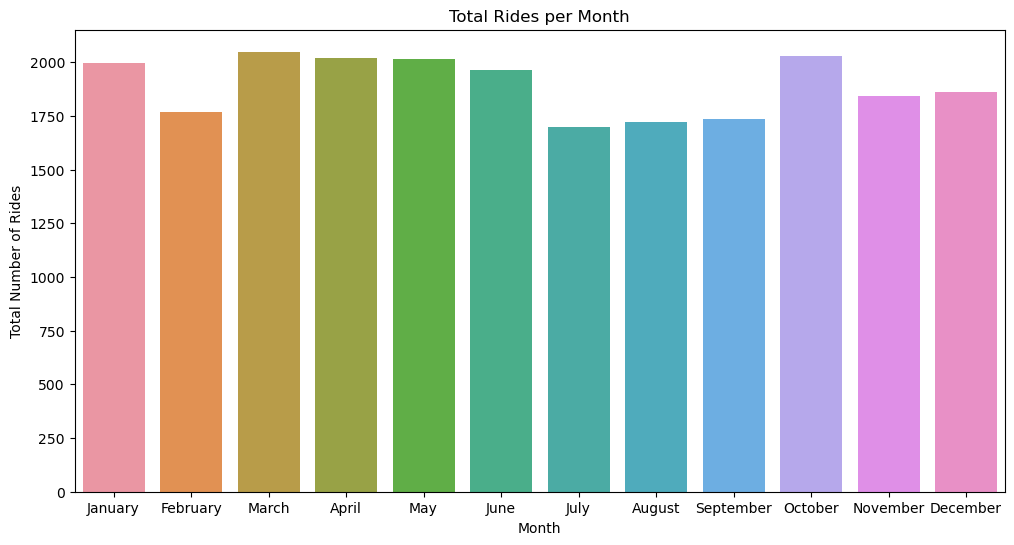

In [30]:
# Create a bar plot of the total number of rides per month:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = monthly_rides.index,
                 y = monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Total Rides per Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Rides')
plt.show()

The data show that monthly ride totals are fairly consistent, with notable dips in February, July, September and October.

In [31]:
# Plot ride count by day:
daily_rides = df['day'].value_counts()
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_rides = daily_rides.reindex(index = day_order)
daily_rides

Sunday       2998
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Name: day, dtype: int64

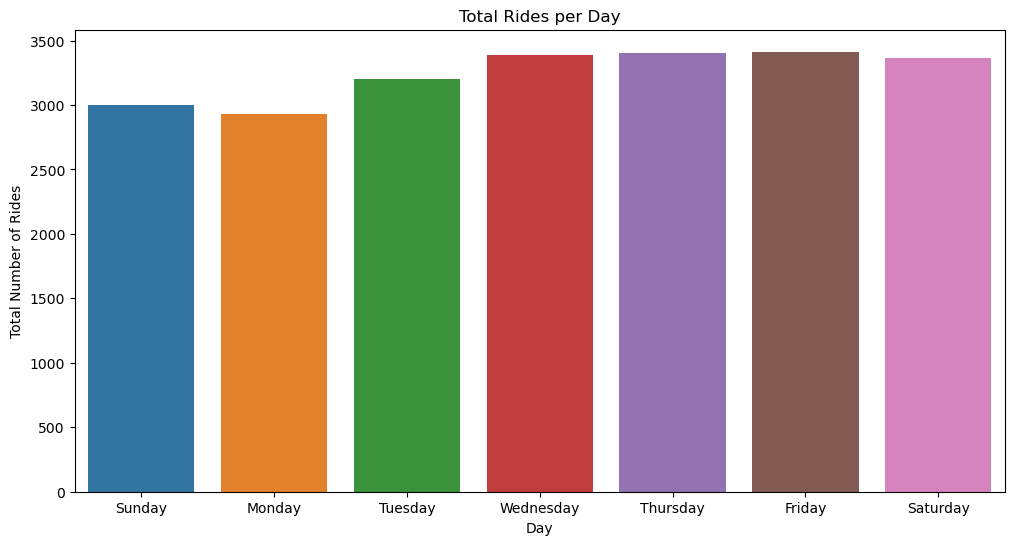

In [32]:
# Create a bar plot for the total number of rides per day:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = daily_rides.index,
                 y = daily_rides)
ax.set_xticklabels(day_order)
plt.title('Total Rides per Day')
plt.xlabel('Day')
plt.ylabel('Total Number of Rides')
plt.show()

According to the plot above, rides on Wednesday through Saturday are consistent and greater than rides on Sunday through Tuesday.

In [33]:
# Explore monthly and daily revenue
# First, monthly total revenue:
monthly_revenue = df.groupby('month').sum()[['total_amount']]
monthly_revenue = monthly_revenue.reindex(index = month_order)
monthly_revenue

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


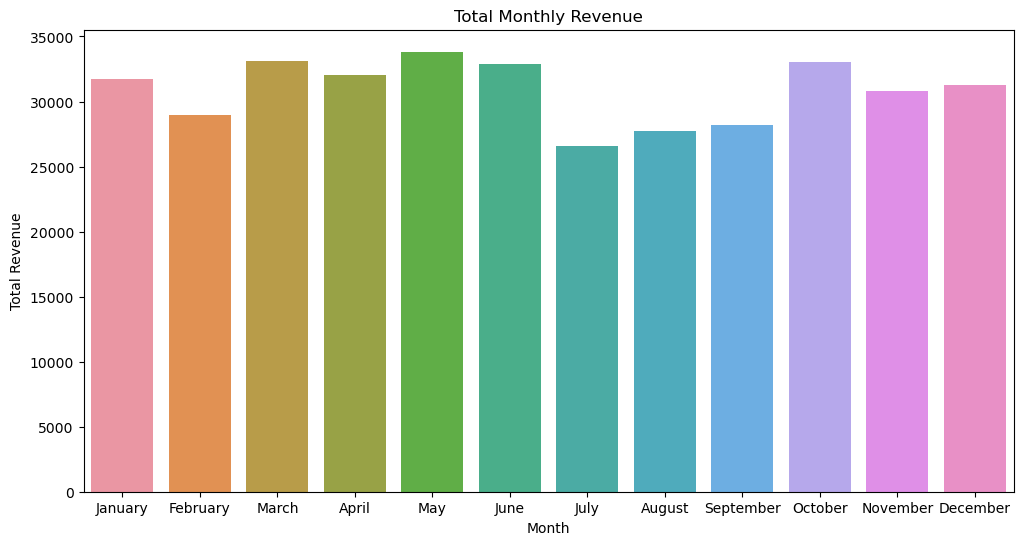

In [34]:
# Create a bar plot of total monthly revenue:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = monthly_revenue.index,
                 y = monthly_revenue['total_amount'])
plt.title('Total Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

Total monthly revenue appears to follow the same trend as total monthly rides.

In [35]:
# Create a bar plot of total daily revenue
daily_revenue = df.groupby('day').sum()[['total_amount']]
daily_revenue = daily_revenue.reindex(index = day_order)
daily_revenue

,total_amount
day,
Sunday,48624.06
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40


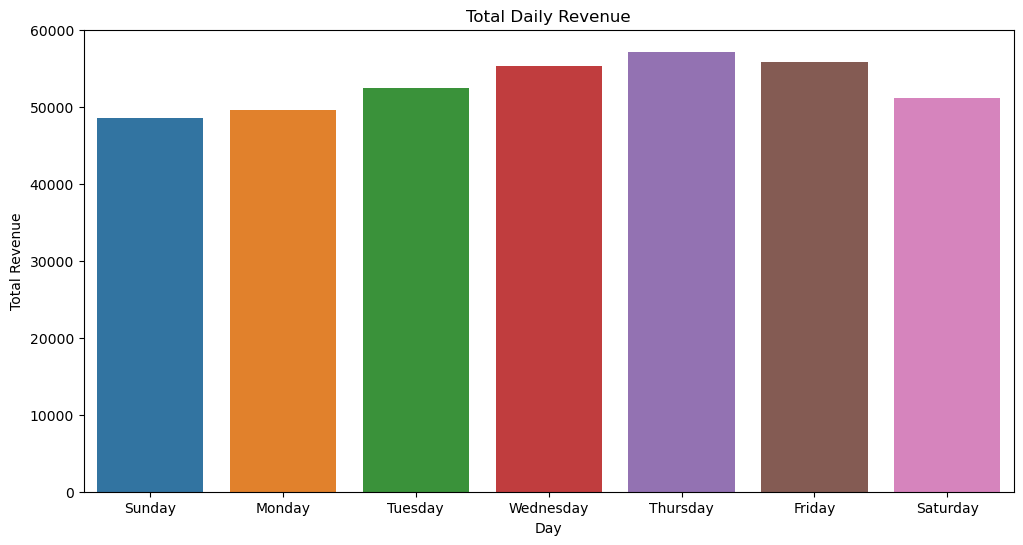

In [36]:
# Create a bar plot of total daily revenue:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = daily_revenue.index,
                 y = daily_revenue['total_amount'])
plt.title('Total Daily Revenue')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.show()

According to the plot above, Thursday had the highest revenue, whereas the weekend days had the least. It is worth noting that Saturday had 35 fewer rides than Thursday, but Saturday's revenue is about \\$6000 less than Thursday (a more than 10% difference).

In [37]:
# Finally, it would be worth adding a trip_duration column which could
# potentially be useful for the final model:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43


Adding the trip_duration column can ultimately help to understand other potentially important information such as the relationship between total fare and trip duration, or trip duration and total distance.

## Key Findings

1. There are no missing values in the dataset
2. The highest distribution of trip distances are below 5 miles. The minimum **trip_distance** is 0 which could potentially be erroneous and needs to be better understood. 
3. The highest distribution of **total_fare** is between about \\$5 and \\$15 with some very high outliers that need investigated.
4. The minimum **fare_amount** is \\$-120 and the max is \\$999.99. While a negative fare amount is impossible, the max amount listed is far above the average of $13 and should be investigated.
5. The max **tip_amount** is \\$200 which is extremely high compared to the average of \\$2.8, and an unusual amount for a tip. Tip amounts generally are not affected by TPEP device or passenger count.


## Statistical Analysis

**Scenario:** The New York TLC has requested Automatidata to analyze the relationship between fare amount and payment type through hypothesis and A/B testing. The A/B test should aim to find ways to generate more revenue for taxi cab drivers.

**Note:** For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups:
> 1. Customers who are required to pay with credit card
> 2. Customers who are required to pay with cash<br>

Without this assumption, causal conclusions cannot be drawn about how payment method affects fare amounts.

The goal is to apply descriptive statistics and hypothesis testing and to sample data and analyze whether there is a relationship between payment type and fare amount (i.e. discover if customers who use credit cards pay higher fare amounts than customers who use cash).

In [38]:
# Load the necessary statistcal packages
from scipy import stats

In [39]:
# Explore the descriptive statistics for the dataset
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,0 days 00:17:00.826600290
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,0 days 01:01:59.788923306
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-1 days +23:43:01
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,0 days 00:06:39
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,0 days 00:11:11
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,0 days 00:18:23
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,0 days 23:59:33


As documented earlier, the payment type is encoded with 5 integers:
1. Credit Card
2. Cash
3. No Charge
4. Dispute
5. Unknown

Since there is interest in looking at the relationship between pament type and the fare amount, using the mean would give insight into the average fare amoutn by payment type.

In [40]:
# Determine the mean fare amount grouped by payment type
mean_fare_by_payment_type = df.groupby('payment_type')['total_amount'].mean()
mean_fare_by_payment_type

payment_type
1    17.663577
2    13.545821
3    13.579669
4    11.238261
Name: total_amount, dtype: float64

The results above show that customers who pay by credit card pay a larger fare amount than customers who pay in cash. However, it is unknown if this difference is due to random sampling rather than being a true difference in fare amount. A hypothesis test can be used to determine this.

Null Hypothesis $H_0$: There is no difference in the average fare amount between customers who use credit cards versus customers who pay with cash.

Alternative Hypothesis $H_A$: There is a difference in the average fare amount between customers who use credit cards versus customers who pay with cash.

Assuming a significance level of 5%, a two-sample t-test can be performed to if the total fare difference is statistically significant.

In [41]:
# First, isolate the credit card and cash payments
credit_card_fares = df[df['payment_type'] == 1]['total_amount']
cash_fares = df[df['payment_type'] == 2]['total_amount']

# Perform a two-sample t-test
stats.ttest_ind(credit_card_fares, cash_fares, equal_var = False)

Ttest_indResult(statistic=20.34644022783838, pvalue=4.5301445359736376e-91)

The results show that the p-value is significantly less than the significance level of 0.05, indicating rejection of the null hypothesis. This means that there is statistically significant evidence to suggest a difference in the average total fare amount between customers who use credit cards and those who use cash (supporting the alternative hypothesis).

## Multiple Linear Regression Modeling

At this point, the relationship between fare amounts and payment type has been analyzed. The project stakeholders wish to have further insight through the use of regression modeling. The goal of this section is to build and run a regression model for taxi fares based on variables in the dataset. 

The following tasks should be performed:
>- Determine the correct modeling approach
>- Build a regression model
>- Finish checking model assumptions
>- Evaluate the model
>- Interpret model results and summarize findings

### EDA & Checking Model Assumptions

In [42]:
# Import all necessary packages for numerics, dataframes, visualization, statistcal analysis and modeling

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

First, repeat some of the EDA steps to be sure the data is in the proper format for regression analysis.

In [43]:
# Use .shape and .info() to confirm row and column count and recheck for any missing data
print(df.shape)
df.info()

(22699, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-n

In [44]:
# Since there are no missing values check the data for duplicates
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(num_duplicates)

0


The dataset has no missing values and no duplicated data.

In [45]:
# Use .describe() to revisit dataset descriptive statistics
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,0 days 00:17:00.826600290
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,0 days 01:01:59.788923306
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-1 days +23:43:01
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,0 days 00:06:39
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,0 days 00:11:11
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,0 days 00:18:23
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,0 days 23:59:33


Since the three main variables that will be used for estimating fares before rides will be **trip_distance**, **fare_amount** and **trip_duration**, it would be worth revisiting outlier analysis for these variables and making a decision on how to handle them. Boxplots should be recreated for these three variables to observe outliers. The **trip_duration** column is currently in timedelta format and needs to first be converted to minutes.

In [46]:
# Convert the trip_duration column to minutes
df['duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60

# Confirm the conversion
df.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,duration_minutes
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12,7.200000


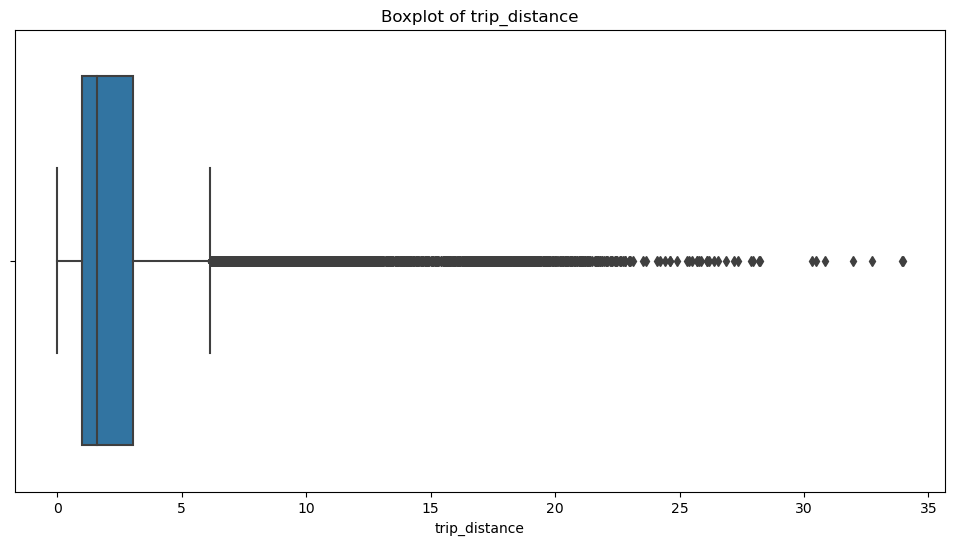

In [47]:
# Create a boxplot for trip_distance
plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = 'trip_distance')
plt.title('Boxplot of trip_distance')
plt.show()

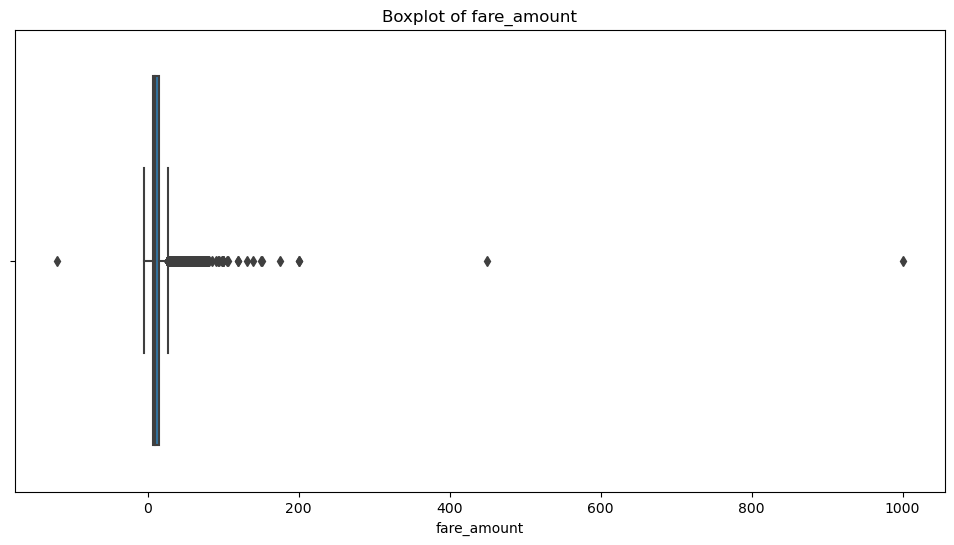

In [48]:
# Create a boxplot for fare_amount
plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = 'fare_amount')
plt.title('Boxplot of fare_amount')
plt.show()

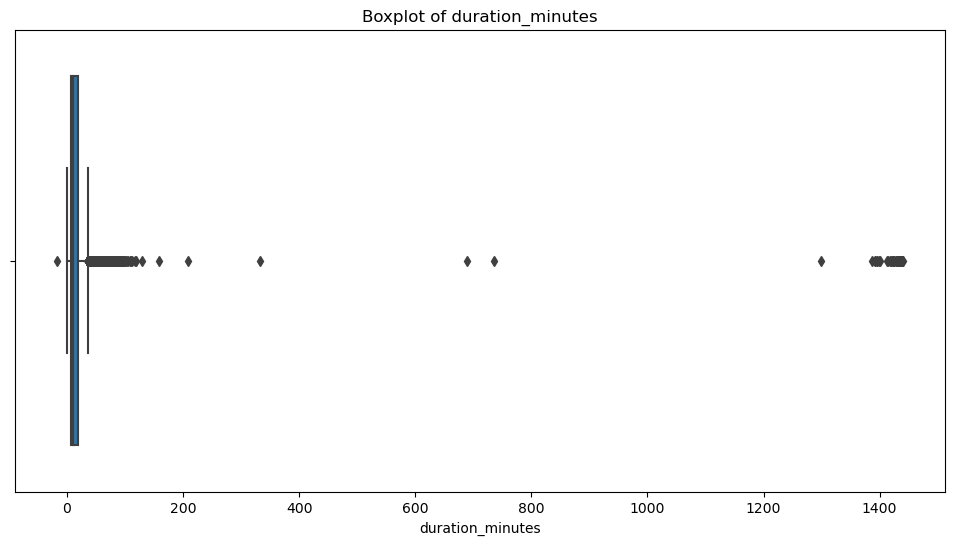

In [49]:
# Create a boxplot for duration
plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = 'duration_minutes')
plt.title('Boxplot of duration_minutes')
plt.show()

### Imputations

#### **`trip_distance` outliers**

The summary statistcs show that there are trip distances of 0 and it is unknown if these are reflective of erroneous data or if they are very short trips that get rounded down. This can be checked by sorting the column values and inspecting the least 10 values to determine if they are precise or rounded.

In [50]:
# Sort the column values by trip_distance and inspect the first 10 values
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The result above shows trip distances are recorded to a precision of one one-hundredth of a mile, so it is reasonable to assume that the 0 trip distances are real, and not erroneous data. That being said, it might be possible for trips to have a distance of 0 if a passenger requests taxi service then cancels or changes their mind. Are there enough of these types of trips to cause any issue with later modeling? 

In [51]:
# Determine the number of rides where the trip_distance is 0
zero_distance = (df['trip_distance'] == 0).sum()
print('Number of 0 distance rides:', zero_distance)

Number of 0 distance rides: 148


Out of nearly 23,000 rides, 148 (about 0.6%) have a recorded distance of 0. Such a low percentage is unlikely to have much of an effect on the model so no further modifications need done to this column. 

#### **`fare_amount` outliers**

In [52]:
# Show the summary statistics for just the fare_amount column
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

The range of values in the fare_amount column is very large and the min/max values don't make sense:
>- Negative values will be problematic for modeling whereas any values of 0 could be legitimate if the taxi logged a trip that was immediately cancelled.
>- The maximum fare amount is nearly \\$1000 which seems unlikely. Using intuition and statistics, it is possible to create a cap of the max fare. The interquartile range (IQR) is \\$8 (Q3 - Q1). Using the standard formula of Q3 + (1.5 * IQR) results in a cap of \\$26.50. This seems like a low fare, so using a factor of 6 instead results in a fare cap of \\$62.50 which seems more reasonable.

Using a minimum fare of 0 and a maximum fare of $62.50, the next step is to impute fares less than 0 with 0 and the maximum fare as Q3 + (6 * IQR).

A function can be used to compute the IQR for each column requiring modification, reassign the minimum to zero, and impute the new upper threshold for columns that have values exceeding the upper threshold.

In [53]:
# Define a function, outlier_imputer

def outlier_imputer(column_list, iqr_factor):
    ''' Impute upper-limit values in specified columns based on their IQR.
    
    Arguments:
        column_list: the list of columns to iterate over
        iqr_factor: the factor 'x' in the formula Q3 + (x * IQR) which is used to determine maximum threshold beyond which a value is considered an outlier.
    '''
    for col in column_list:
        # Reassign the minimum to 0
        df.loc[df[col] < 0, col] = 0
        
        # Calculate the upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)
        
        # Reassign values greater than the threshold to the new threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [54]:
# Set the new min and max values for fare_amount
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### **`duration` outliers**

In [55]:
# Show the summary statistics for just the duration_minutes column
df['duration_minutes'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration_minutes, dtype: float64

The **duration_minutes** column also has problematic min and max values:
>- Ride durations less than 0 do not make sense and should be imputed with 0.
>- Extremely high trip durations are also unreasonable. For the purpose of this project they will be corrected in the same way as the fare outliers, using Q3 + (6 * IQR)

Using the `outlier_imputer` function defined earlier, the **duration_minutes** outliers can be corrected.

In [56]:
# Impute the outliers using the outlier_imputer function
outlier_imputer(['duration_minutes'], 6)

duration_minutes
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration_minutes, dtype: float64



### Feature Engineering

#### Create a **mean_distance** column

Since the ultimate goal of this project is to predict fares before the ride occurs, it would be useful to know the mean distance for each ride sharing the same pickup and dropoff points. A new column, `mean_distance` can be created to capture this information. It should be noted that, for example, the distance from A to B might be different than the distance from B to A, so all trips that share a unique pair of pickup and dropoff points need grouped and averaged. The new `mean_distance` column will therefore be added where the value at each row is the average for all trips with those pickup and dropoff locations.

In [57]:
# Create a "helper" column pickup_dropoff which contains the unique combination of pickup and dropoff location IDs for each row
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' +df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(3)

0    100 231
1     186 43
2    262 236
Name: pickup_dropoff, dtype: object

In [58]:
# Group each row by the pickup_dropoff columm, compute the mean for only the trip_distance column
grouped = df.groupby('pickup_dropoff')['trip_distance'].mean()
grouped.head()

pickup_dropoff
1 1         2.433333
10 148     15.700000
100 1      16.890000
100 100     0.253333
100 107     1.180000
Name: trip_distance, dtype: float64

In [59]:
# Convert the dataframe to a dictionary 
grouped_dict = grouped.to_dict()

# Create a mean_distance column that is a copy of the pickup_dropoff column
df['mean_distance'] = df['pickup_dropoff']

# Map grouped_dict to the mean_distance column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm the changes
df['mean_distance'].head(5)

0    3.521667
1    3.108889
2    0.881429
3    3.700000
4    4.435000
Name: mean_distance, dtype: float64

#### Create a **mean_duration** column

Repeat the process for creating **mean_distance** for a new column **mean_duration**.

In [60]:
# Regroup the dataframe by pickup_dropoff and calculate the mean duration_minutes
grouped = df.groupby('pickup_dropoff')['duration_minutes'].mean()

# Create a dictionary where the keys are unique pickup_dropoff IDs and values are the mean trip duration for all trips with those pickup_dropoff IDs
grouped_dict = grouped.to_dict()

# Create a mean_duration column that is a copy of the pickup_dropoff column
df['mean_duration'] = df['pickup_dropoff']

# Map grouped_dict to the mean_duration column
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm the changes
df['mean_duration'].head(5)

0    22.847222
1    24.470370
2     7.250000
3    30.250000
4    14.616667
Name: mean_duration, dtype: float64

#### Create columns for **day** and **month**

To track fares by day of the week and month of the year, two new columns for **day** and **month** need to be generated.

In [61]:
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

# Confirm the new columns
df.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,duration_minutes,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,mar,saturday,0 days 00:14:04,14.066667,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,apr,tuesday,0 days 00:26:30,26.500000,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,dec,friday,0 days 00:07:12,7.200000,262 236,0.881429,7.250000


#### Create a **rush_hour** column

Trip durations can be affected by the time of day that the trip was taken, particularly during rush hour. For the purpose of this project, rush hour will be defined as:
>- Any weekday (not Saturday or Sunday) AND
>- Either from 06:00 - 10:00 or from 16:00 - 20:00

Based on this, a **rush_hour** column needs created with binary values of 1 if the ride was during rush hour and 0 if it was not.

In [62]:
# Create the rush_hour column by filling in with the time from tpep_pickup_datetime
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If the day is Saturday or Sunday, impute a 0 in the rush_hour column
df.loc[df['day'].isin(['saturday, sunday']), 'rush_hour'] = 0

# Create a function that assigns a 1 to times within stated rush hours, and 0 to times outside the stated rush hours
def rush_hour_func(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

# Apply rush_hour_func to the rush_hour column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hour_func, axis = 1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,improvement_surcharge,total_amount,month,day,trip_duration,duration_minutes,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.3,16.56,mar,saturday,0 days 00:14:04,14.066667,100 231,3.521667,22.847222,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.3,20.80,apr,tuesday,0 days 00:26:30,26.500000,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.3,8.75,dec,friday,0 days 00:07:12,7.200000,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.3,27.69,may,sunday,0 days 00:30:15,30.250000,188 97,3.700000,30.250000,13
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.3,17.80,apr,saturday,0 days 00:16:43,16.716667,4 112,4.435000,14.616667,23


### Exploring **mean_duration** and **fare_amount**

Visualizing the relationship between `mean_duration` and `fare_amount` could help understand the correlations between these two variables, both of which are important for the overall goal. 

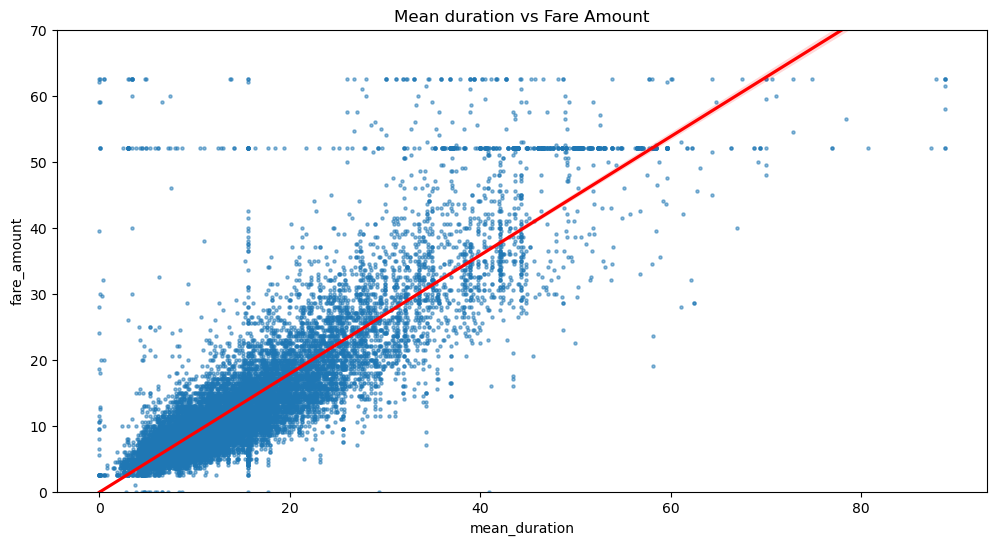

In [63]:
# Create a scatterplot of mean_duration and trip_distance
plt.figure(figsize = (12,6))
sns.regplot(x = 'mean_duration', y = 'fare_amount', data = df,
            scatter_kws = {'alpha':0.5, 's':5},
            line_kws = {'color':'red'})
plt.title('Mean duration vs Fare Amount')
plt.ylim(0,70)
plt.show()

The plot above shows a linear correlation between `mean_duration` and `fare_amount` but there are two odd horizontal lines at what appear to be \\$52 and \\$63. The horizontal line at \\$63 is most likely the imputed maximum for outliers, but this doesn't explain the other line. The number of rides represented in the other horizontal line should be investigated.

In [64]:
# Count the number of fares greater than $50
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

The result above shows 514 fares of \\$52 which seems like an extremely high number relative to the other fare amounts. Examining the full dataset for a selection of fares at \\$52 may help reveal why there are so many.

In [65]:
# Display 30 rows of all columns for fares of $52
pd.set_option('display.max_columns', None)
df[df['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,duration_minutes,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,mar,sunday,0 days 00:36:48,36.800000,236 132,19.211667,40.500000,19
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,jun,saturday,0 days 01:06:51,66.850000,132 163,19.229000,52.941667,14
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,nov,saturday,0 days 00:00:58,0.966667,132 132,2.255862,3.021839,20
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,dec,wednesday,0 days 00:29:11,29.183333,132 79,19.431667,47.275000,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,sep,sunday,0 days 00:29:29,29.483333,132 234,17.654000,49.833333,23
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,feb,tuesday,0 days 00:39:50,39.833333,132 48,18.761905,58.246032,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,jun,monday,0 days 00:15:37,15.616667,228 88,4.730000,15.616667,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,aug,thursday,0 days 00:45:27,45.450000,132 48,18.761905,58.246032,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,sep,tuesday,0 days 00:42:51,42.850000,186 132,17.096000,42.920000,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,apr,sunday,0 days 01:11:35,71.583333,132 148,17.994286,46.340476,21


Nearly every line in the 30 displayed above show a pickup or dropoff location of 132 and a RatecodeID of 2. The data dictionary shows that a RatecodeID of 2 indicates trips for JFK (John F. Kennedy Airport), so it is reasonable to infer that taxi trips to and from JFK airport have a flat rate of \\$52.

### Isolation of Model Variables

For simplicity in model building, all dataframe features that are redundant or irrelevant should be dropped at this point.

In [66]:
# Review the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-null  float64

In [67]:
# Create a copy of the dataframe in order to leave the original untouched, then drop all redundant or irrelevant columns
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration_minutes',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   VendorID         22699 non-null  int64          
 1   passenger_count  22699 non-null  int64          
 2   fare_amount      22699 non-null  float64        
 3   trip_duration    22699 non-null  timedelta64[ns]
 4   mean_distance    22699 non-null  float64        
 5   mean_duration    22699 non-null  float64        
 6   rush_hour        22699 non-null  int64          
dtypes: float64(3), int64(3), timedelta64[ns](1)
memory usage: 1.2 MB


### Pair Plot to Assess Variable Relationships

Create a pairplot to visualize the pairwise relationships between the `fare_amount`, `mean_duration` and `mean_distance` variables.

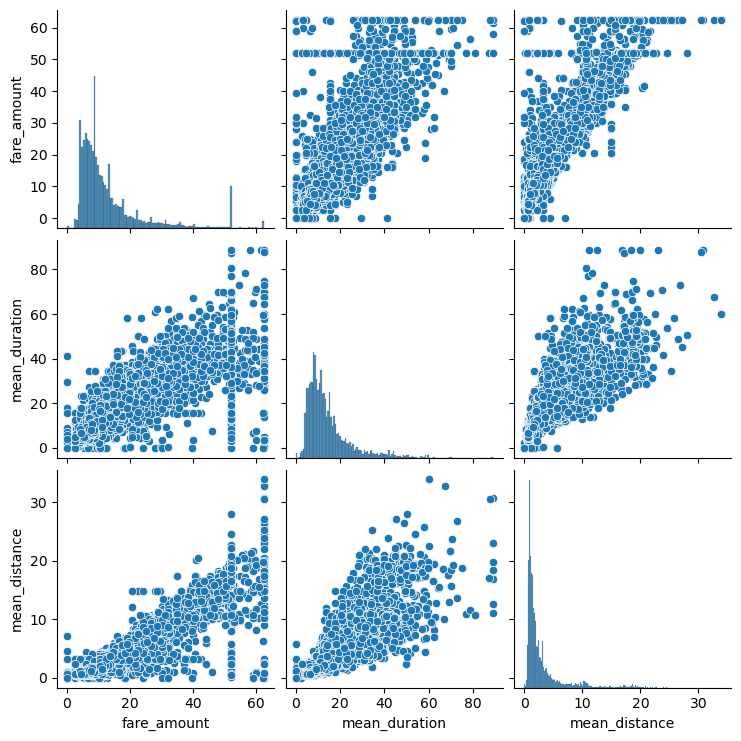

In [68]:
# Create the pairplot

sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']])


The pairplot above shows that all three variables show linear correlation with each other, which requires further investigation.

### Correlation Matrix and Heatmap

In order to determine which variables are most correlated, a correlation matrix can be generated along with the corresponding heatmap for better visualization.

In [69]:
# Create a correlation matrix containing pairwise correlation of columns using the Pearson correlation coefficients
df2.corr(method = 'pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.006856
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,0.020436
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.007513
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,0.000243
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.001594
rush_hour,-0.006856,0.020436,-0.007513,0.000243,-0.001594,1.000000


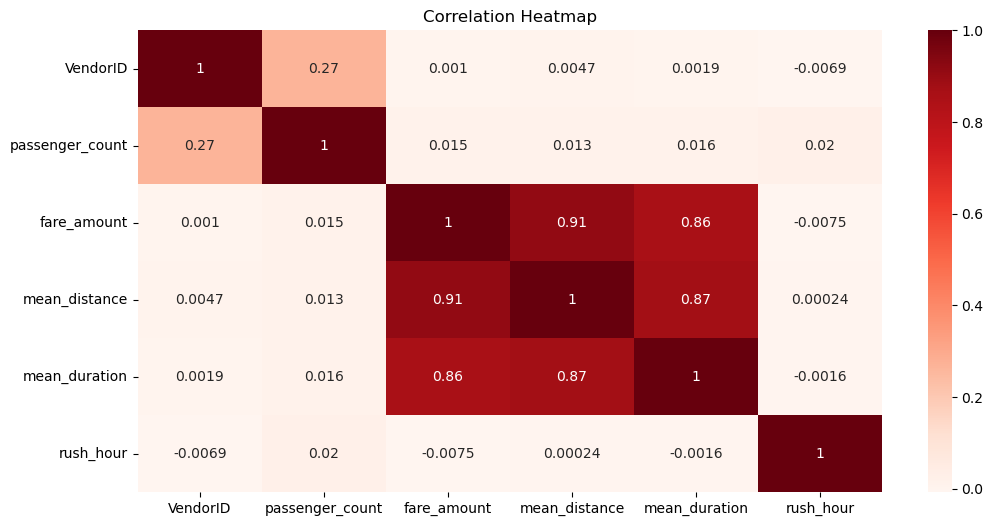

In [70]:
# Use a heatmap to visualize the correlation data
plt.figure(figsize = (12,6))
sns.heatmap(df2.corr(method = 'pearson'), annot = True, cmap = 'Reds')
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows that both `mean_duration` and `mean_distance` are both highly correlated with `fare_amount` (Pearson scores of 0.86 and 0.91, respectively). They are also both correlated with each other (Pearson score of 0.87). Based on these scores, it can be concluded that the model will be able to predict `fare_amount` using either `mean_duration` or `mean_distance` even though they are correlated with each other.

### Split Data into Outcome Variable and Features

For the model, the X and variables need to be set, with X representing the features and y the outcome (target) variable.

In [71]:
# First display the dataframe info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   VendorID         22699 non-null  int64          
 1   passenger_count  22699 non-null  int64          
 2   fare_amount      22699 non-null  float64        
 3   trip_duration    22699 non-null  timedelta64[ns]
 4   mean_distance    22699 non-null  float64        
 5   mean_duration    22699 non-null  float64        
 6   rush_hour        22699 non-null  int64          
dtypes: float64(3), int64(3), timedelta64[ns](1)
memory usage: 1.2 MB


In [72]:
# Separate the target column from the features (set the X variable)
X = df2.drop(columns = ['fare_amount', 'trip_duration'])

# Set the y variable
y = df2[['fare_amount']]

# Display the first few rows of X
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,8
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,13
4,2,1,4.435000,14.616667,23


### Pre-process Model Data

Dummy encode the categorical variables.

In [73]:
# Convert VendorID to a string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first = True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,8,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,13,1
4,1,4.435000,14.616667,23,1


#### Split Data into Training and Test Sets

Create the training and test sets. Set the test set at 20% of the total samples and use random_state = 0.

In [74]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Standardize the Data

Use the StandardScaler(), fit() and transform() functions to standardize the X_train variables, assigning the results to `X_train_scaled`.

In [75]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.8694684   0.17616665  2.86786402  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589 -0.43416768  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.28407533 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.58426003 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597 -0.43416768 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.58426003  0.89286563]]


#### Fit the Model

Instantiate the model and fit it to the training data.

In [76]:
# Fit the model to the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Evaluate the Model

#### Training Data

Evaluate the model performance by calculating the residual sum of squares and the explained variance score (R-squared). Also calculate the mean absolute error, mean squared error and the root mean squared error.

In [77]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)

y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))      

Coefficient of determination: 0.8397836177842671
R^2: 0.8397836177842671
MAE: 2.1889191727695696
MSE: 17.896417264333014
RMSE: 4.230415731855796


#### Test Data

Standardize the X_test data then repeat the model evaluation for the test data.

In [78]:
# Standardize the X_test data
X_test_scaled = scaler.transform(X_test)

# Evaluate the model performance on the test data
r_sq = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq)

y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))      

Coefficient of determination: 0.8679871524376992
R^2: 0.8679871524376992
MAE: 2.1366946988463127
MSE: 14.355947510123043
RMSE: 3.788924320981226


As seen in the results above, the model performance is high for both the training and testing data suggesting that there is little bias in the model and the data are not overfit. For the test data, an R^2 of 0.87 shows that 87% of the variance in `fare_amount` is described by the model.

### Visualize the Results

Visualization of the model results will help to better understand model performance. 

To make the process easier, a dataframe will first be created containing `actual`, `predicted` and `residual` as columns.

In [82]:
# Create a results dataframe
results = pd.DataFrame(data = {'actual':y_test['fare_amount'], 'predicted':y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.459234,1.540766
18134,28.0,16.431437,11.568563
4655,5.5,6.841725,-1.341725
7378,15.5,16.337791,-0.837791
13914,9.5,10.653307,-1.153307


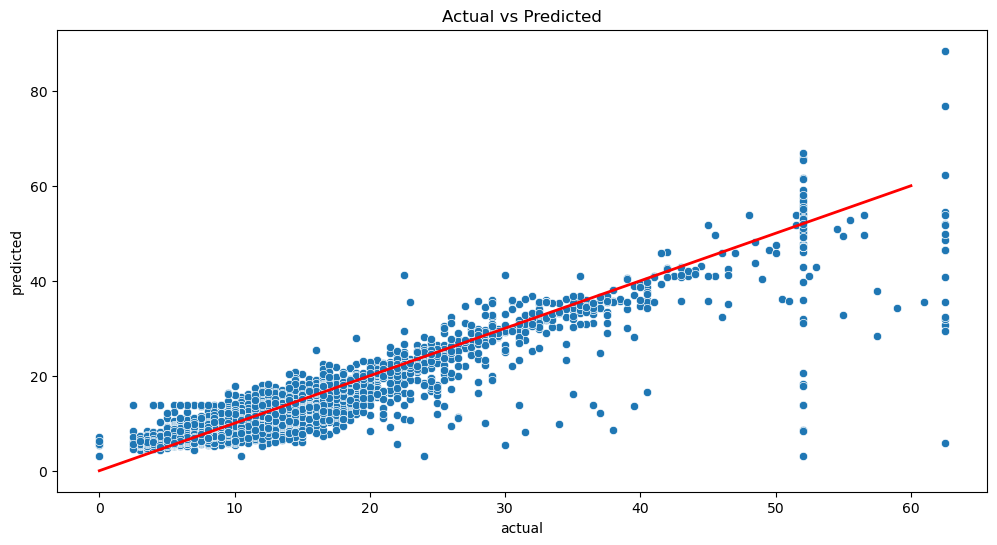

In [84]:
# Create a scatterplot to visualize predicted vs actual
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'actual', y = 'predicted', data = results)
# Plot a theoretical 'perfect results' line
plt.plot([0,60], [0,60], c = 'red', linewidth = 2)
plt.title('Actual vs Predicted')
plt.show()

As expected from the model results, `predicted` and `actual` are linearly correlated with the set maximum threshold of \\$62.50 and the high number of JFK fares causing the vertical lines in the plot.

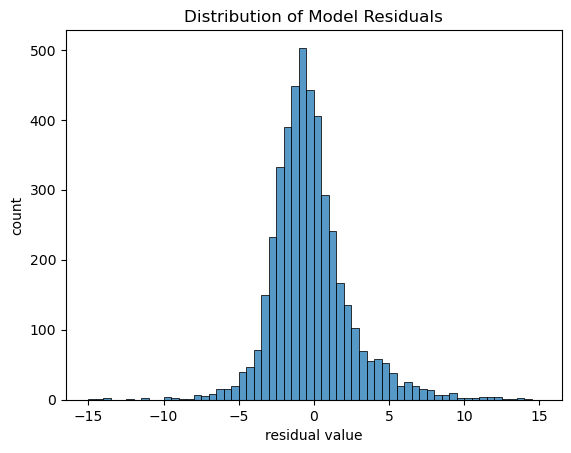

In [83]:
# Use a histogram to visualize the residuals distribution
sns.histplot(results['residual'], bins = np.arange(-15,15.5,0.5))
plt.title('Distribution of Model Residuals')
plt.xlabel('residual value')
plt.ylabel('count')
plt.show()

The histogram above shows an approximately normal distribution of the residuals, demonstrating that the model's errors are evenly distributed and unbiased.

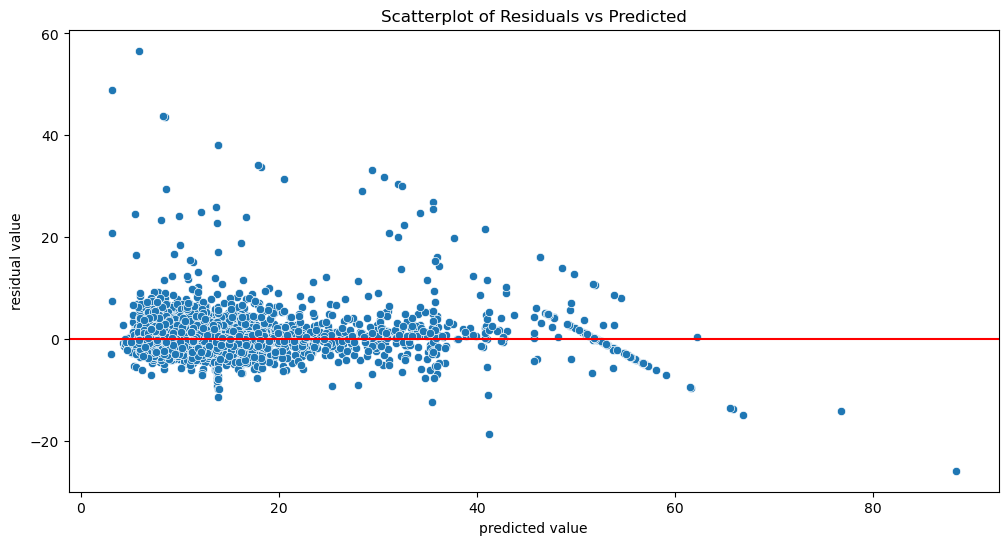

In [86]:
# Create a scatterplot of residuals vs predicted
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'predicted', y = 'residual', data = results)
plt.axhline(0, c = 'red')
plt.title('Scatterplot of Residuals vs Predicted')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

With the exception of the flat JFK fare as well as the imputed maximum which exhibit the slanted lines in the plot above, the scatterplot shows uniform distribution of predicted vs residuals about the residual 0-line.

### Model Coefficients

The regression model coefficients quantify the relationship between each independent variable in the model and the target (dependent) variable. 

In [87]:
# Determine the coefficients for the model
coefficients = pd.DataFrame(lr.coef_, columns = X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.029794,7.125031,2.817057,-0.073708,-0.055362


THe coefficients above reveal that `mean_distance` was the feature with the greatest weight in the model's prediction. Typically this would be interpreted as a \\$7.13 change in fare for every mile traveled, but since the data were standardized the units are no longer miles. A correct interpretation of this coefficient is for every +1 change in standard deviation, the fare increases by \\$7.13.

The data can be unscaled in order to translate this information back to miles instead of standard deviation. This is done by:
1. Calculating the standard deviation of `mean_distance` in the `X_train` data.
2. Dividing the `mean_distance` coefficient by the result of (1).

In [88]:
# Calculate the standard deviation of mean_distance in the X_train data
print(X_train['mean_distance'].std())

# Divide the mean_distance coefficient by the standard deviation
print(7.125031 / X_train['mean_distance'].std())

3.574812975256415
1.9931199336348315


By unscaling the coefficients, the results can now be directly interpreted as for every 3.58 miles traveled, the fare increased by a mean of \\$7.13. Reduced, this equals a mean fare increase of \\$1.99 for every mile traveled.

## Extra stuff

More work must be done to prepare the predictions to be used as inputs into the model for the machine learning course. This work includes:
1. Get the model's predictions on the full dataset
2. Impute the constant fare rate of \\$52 for all trips with rate codes of 2
3. Check the model's performance on the full dataset
4. Save the final predictions and `mean_duration` and `mean_distance` columns for later use.

### Predict on full dataset

In [89]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

### Impute ratecode 2 fare

The data dictionary says that the `RatecodeID` column captures the following information:
>1 = standard rate<br>
>2 = JFK (airport)<br>
>3 = Newark (airport)<br>
>4 = Nassau or Westchester<br>
>5 = Negotiated fare<br>
>6 = Group ride<br>

This means that some fares don't need to be predicted. They can simply be imputed based on their rate code. Specifically, all rate codes of 2 can be imputed with \\$52, as this is a flat rate for JFK.

Other rate codes have some variation. They are not a fixed rate, so these fares will remain untouched.

Impute 52 at all predictions where `RatecodeID` is 2.

In [94]:
# Create a new dataframe containing just the RatecodeID column
final_preds = df[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID is 2
final_preds.loc[final_preds['RatecodeID'] == 2, 'y_preds_full'] = 52
                
# Verify the imputation
final_preds[final_preds['RatecodeID'] == 2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


### Check performance on full dataset

In [95]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:', np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8909589322742387
MAE: 1.9952429108912286
MSE: 12.115627182853425
RMSE: 3.480750950995119


In [96]:
## Save final predictions with mean_duration and mean_distance columns
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.458583
1,24.470370,3.108889,16.172864
2,7.250000,0.881429,6.918968
3,30.250000,3.700000,18.707855
4,14.616667,4.435000,15.701751


In [98]:
# Save nyc_preds_means as a csv file
df.to_csv('nyc_preds_means.csv', index = False)